In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import argparse
import random
import pickle
import cv2
import os
matplotlib.use("Agg")
%matplotlib inline

Using TensorFlow backend.


In [2]:
# initialize the data and labels
data = []
labels = []
datagen = ImageDataGenerator()

In [3]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('images/')))
random.seed(42)
random.shuffle(imagePaths)

In [4]:
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    imgobj = image
    datagen.apply_transform(imgobj,{'theta':20,'shear':20,'zx':0.2,'zy':0.2})
    datagen.apply_transform(imgobj,{'flip_horizontal':True})
    datagen.apply_transform(imgobj,{'zoom_range':0.5})
    image1 = cv2.resize(imgobj, (64, 64)).flatten()
    data.append(image1)
    image2 = cv2.resize(image, (64, 64)).flatten()
    data.append(image2)
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    labels.append(label)

In [5]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [6]:
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [7]:
# define the 3072-1024-256-3 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(12288,), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu")) # Hidden 1
model.add(Dropout(0.2))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [8]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.0085
EPOCHS = 40 

In [9]:
# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

[INFO] training network...


In [10]:
# train the neural network
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=EPOCHS, batch_size=32)

Train on 169 samples, validate on 57 samples
Epoch 1/40
169/169 [==============================] - 1s 6ms/step - loss: 1.9749 - acc: 0.1716 - val_loss: 1.6259 - val_acc: 0.2281
Epoch 2/40
169/169 [==============================] - 1s 4ms/step - loss: 1.6635 - acc: 0.2722 - val_loss: 1.5117 - val_acc: 0.3158
Epoch 3/40
169/169 [==============================] - 1s 4ms/step - loss: 1.4274 - acc: 0.4024 - val_loss: 1.4951 - val_acc: 0.2982
Epoch 4/40
169/169 [==============================] - 1s 4ms/step - loss: 1.3595 - acc: 0.4615 - val_loss: 1.6385 - val_acc: 0.3684
Epoch 5/40
169/169 [==============================] - 1s 4ms/step - loss: 1.3776 - acc: 0.4320 - val_loss: 1.5459 - val_acc: 0.2982
Epoch 6/40
169/169 [==============================] - 1s 4ms/step - loss: 1.2110 - acc: 0.5503 - val_loss: 1.1694 - val_acc: 0.5614
Epoch 7/40
169/169 [==============================] - 1s 4ms/step - loss: 1.4199 - acc: 0.4675 - val_loss: 1.3090 - val_acc: 0.4737
Epoch 8/40
169/169 [===========

[INFO] evaluating network...
                     precision    recall  f1-score   support

       akshay_kumar       0.80      1.00      0.89         8
       katrina_kaif       0.73      1.00      0.85        11
nawazuddin_siddiqui       1.00      0.83      0.91        12
      ranbir_kapoor       0.83      0.83      0.83        12
        zarine_khan       1.00      0.71      0.83        14

          micro avg       0.86      0.86      0.86        57
          macro avg       0.87      0.88      0.86        57
       weighted avg       0.89      0.86      0.86        57



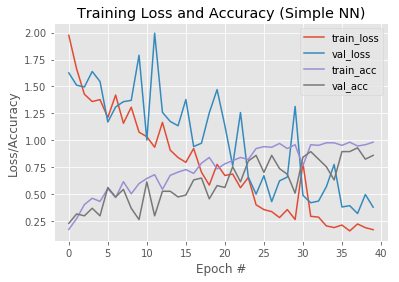

In [11]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('stats-eval.png')